In [1]:
# Q1

b0= 4
b1 = 3
x=2
y = b0 + (b1*x)
print(y)

10


In [2]:
# Q2
# y = b0 + (b1*1)+ (b2*2)+ (b3*3) 

In [3]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\Win 10 Pro\Downloads\scrap price (1).csv")

In [5]:
# Null handling
df.isnull().sum()

ID                    4
symboling             4
name                  4
fueltypes             4
aspiration            4
doornumbers           4
carbody               4
drivewheels           4
enginelocation        4
wheelbase             4
carlength             4
carwidth              4
carheight             4
curbweight            4
enginetype            4
cylindernumber        4
enginesize            4
fuelsystem            4
boreratio             4
stroke                4
compressionratio      4
horsepower            4
peakrpm               4
citympg               4
highwaympg            4
price                 4
Unnamed: 26         209
Unnamed: 27         209
dtype: int64

In [6]:
# Column handling
df.drop(['ID','name','symboling','Unnamed: 26','Unnamed: 27'],axis =1, inplace = True)

In [7]:
df.dropna(inplace=True)

In [8]:
# Noise handling
for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n',sep = '\n')

fueltypes
['diesel' 'gas']


aspiration
['std' 'turbo']


doornumbers
['four' 'two']


carbody
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']


drivewheels
['4wd' 'fwd' 'rwd']


enginelocation
['front' 'rear']


wheelbase
['"69*/"' '#$' '#$%' '$%98' '100.4' '101.2' '102' '102.4' '102.7' '102.9'
 '103.3' '103.5' '104.3' '104.5' '104.9' '105.8' '106.7' '107.9' '108'
 '109.1' '110' '112' '113' '114.2' '115.6' '120.9' '86.6' '88.4' '88.6'
 '89.5' '91.3' '93' '93.1' '93.3' '93.7' '94.3' '94.5' '95.1' '95.3'
 '95.7' '95.9' '96' '96.1' '96.3' '96.5' '96.6' '96.9' '97' '97.2' '97.3'
 '98.4' '98.8' '99.1' '99.2' '99.4' '99.5' '99.8']


carlength
[141.1 144.6 150.  155.9 156.9 157.1 157.3 157.9 158.7 158.8 159.1 159.3
 162.4 163.4 165.3 165.6 165.7 166.3 166.8 167.3 167.5 168.7 168.8 168.9
 169.  169.1 169.7 170.2 170.7 171.2 171.7 172.  172.4 172.6 173.  173.2
 173.4 173.5 173.6 174.6 175.  175.4 175.6 175.7 176.2 176.6 176.8 177.3
 177.8 178.2 178.4 178.5 180.2 180.3 181.5 181.7 183.1 1

In [9]:
for i in df.columns:
    df = df[~df[i].isin(['"69*/"', '#$', '#$%' ,'$%98','#$%','(OP*/)','$%98','po/*','E#$'])]

In [10]:
# Assign Datatype 
cat= []
for i in df.columns:
    try:
        df[i] = df[i].astype('float64')
    except:
        cat.append(i)

In [11]:
cat

['fueltypes',
 'aspiration',
 'doornumbers',
 'carbody',
 'drivewheels',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [12]:
# df['fueltypes'].replace({'diesel':1, 'gas':2})
# df['aspiration'].replace({'std':1, 'turbo':2})
# df['doornumbers'].replace({'four':1, 'two':2})
# df['carbody'].replace({'convertible':1, 'hardtop':2, 'hatchback':3, 'sedan':4, 'wagon':5})
# df['drivewheels'].replace({'4wd':1, 'fwd' :2,'rwd':3,})
# df['enginelocation'].replace({'front':1, 'rear':2})
# df['enginetype'].replace({'dohc':1, 'dohcv':2, 'l':3, 'ohc':4, 'ohcf':5, 'ohcv':6, 'rotor':7})
# df['cylindernumber'].replace({'eight':1, 'five':2, 'four':3, 'six':4, 'three':5, 'twelve':6, 'two':7})
# df['fuelsystem'].replace({'1bbl':1, '2bbl':2, '4bbl':3, 'idi':4, 'mfi':5, 'mpfi':6, 'spdi':7, 'spfi':8})

C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_9480\3224120032.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


<AxesSubplot: >

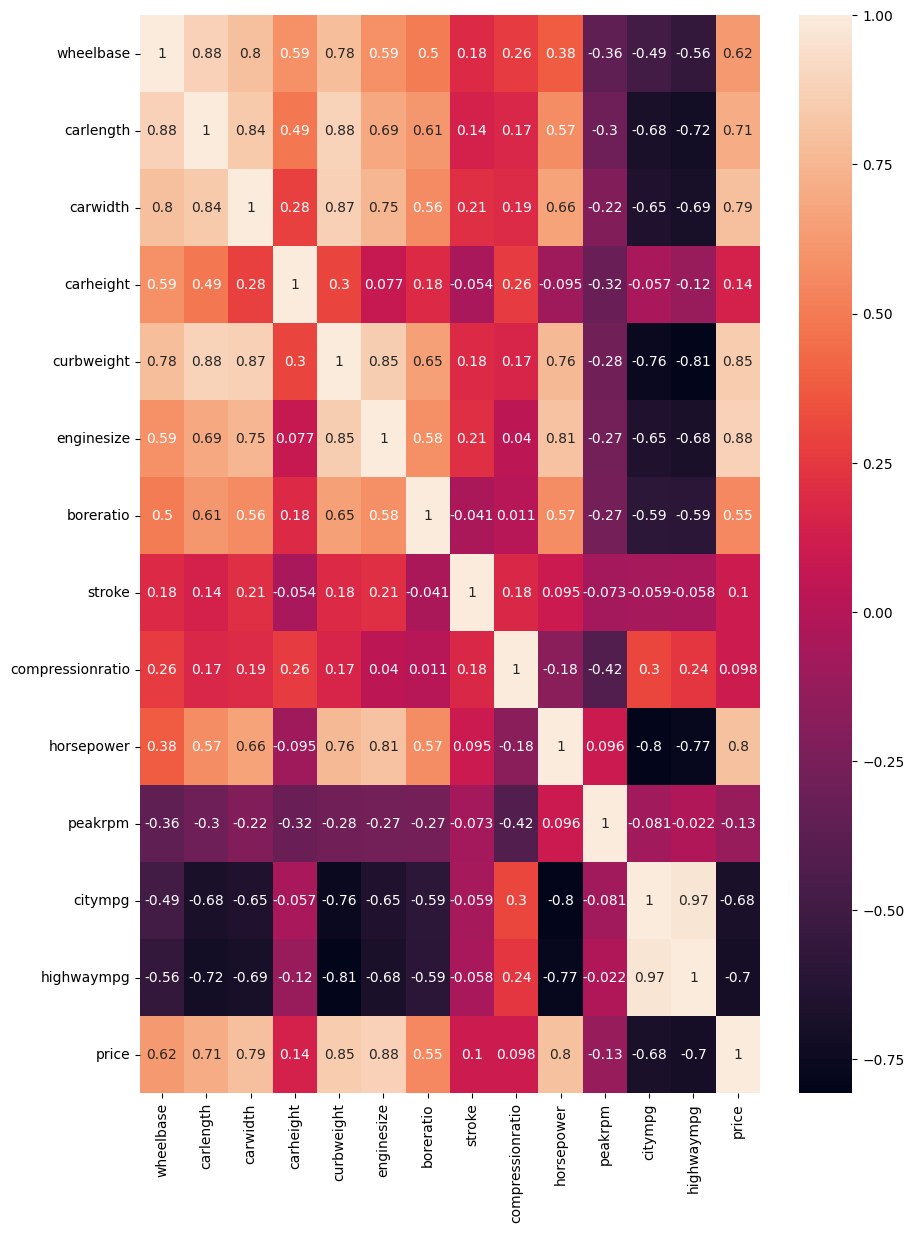

In [13]:
# Correltion Heatmap
plt.figure(figsize= (10,14))
sns.heatmap(df.corr(), annot =True)

In [14]:
# Drop high correlation columns
df1 = df.drop([ 'curbweight','enginesize','horsepower'],axis=1)

<AxesSubplot: xlabel='enginesize', ylabel='price'>

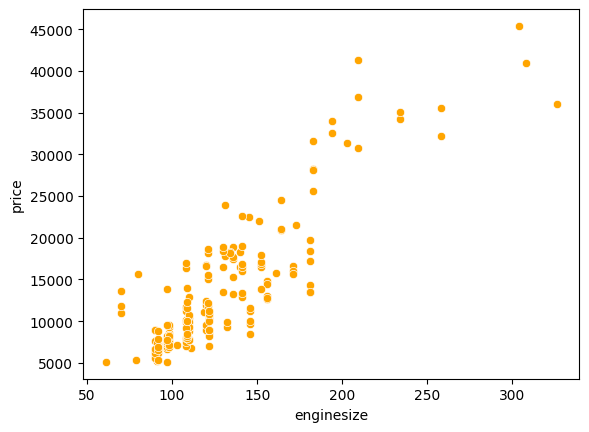

In [15]:
sns.scatterplot(df,x='enginesize',y='price',color='orange')

In [16]:
# Outlier Analysis
num = df1.drop(cat, axis=1).columns.tolist()
num

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

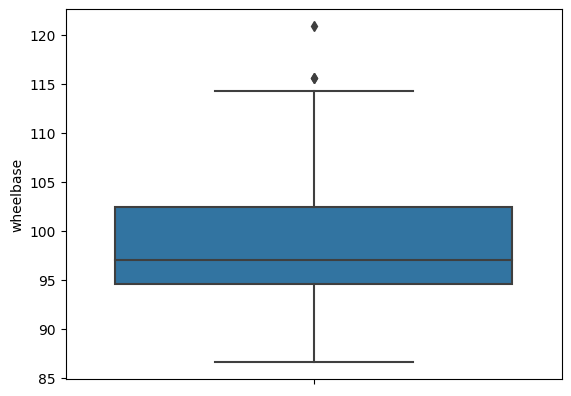

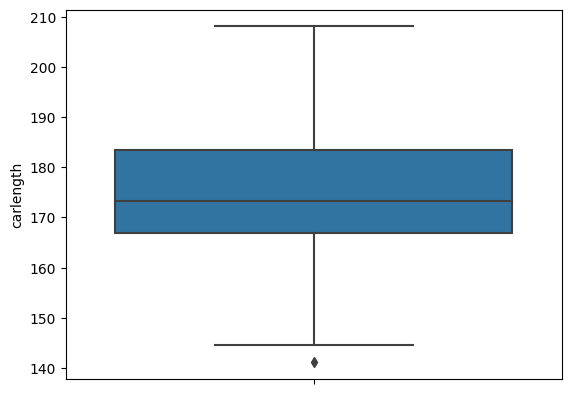

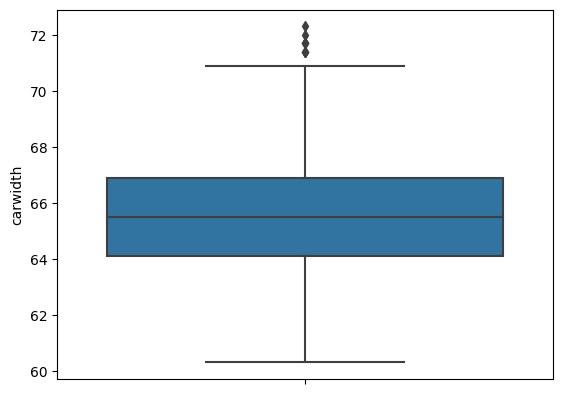

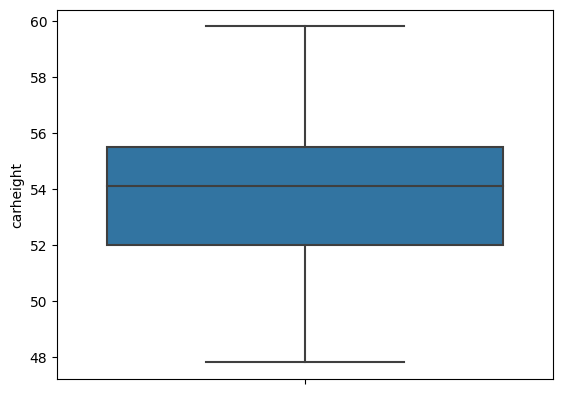

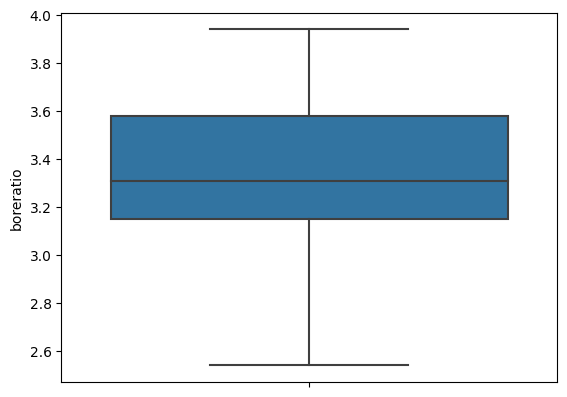

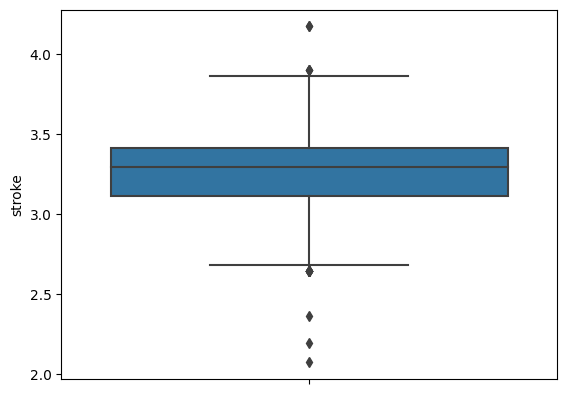

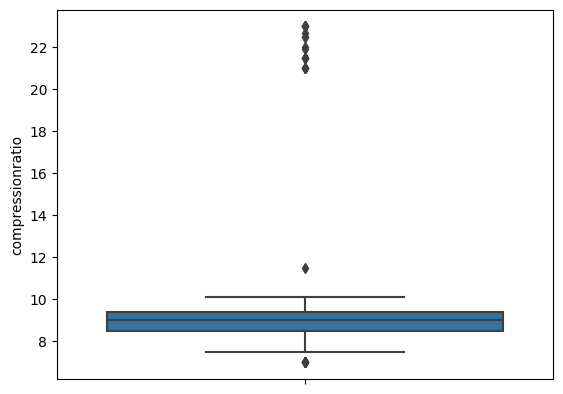

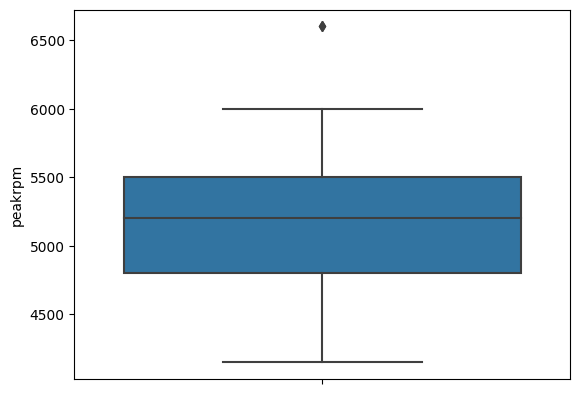

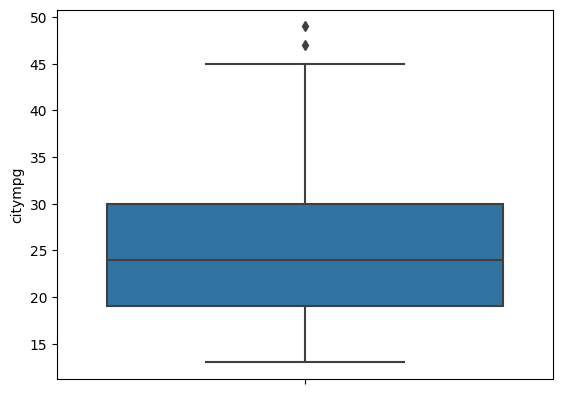

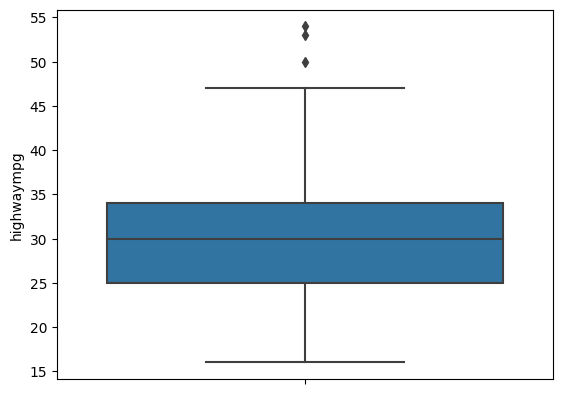

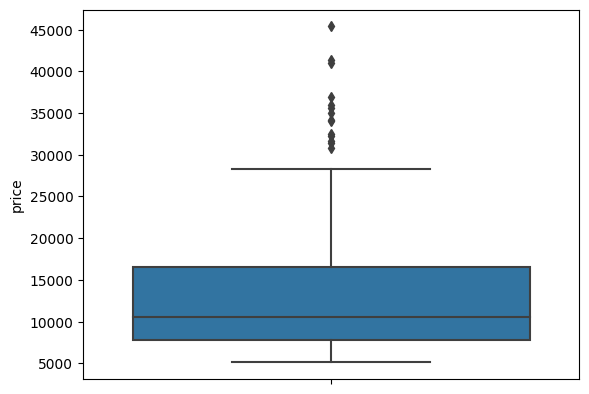

In [17]:
for i in num:
    plt.figure()
    sns.boxplot(y=i,data=df1)

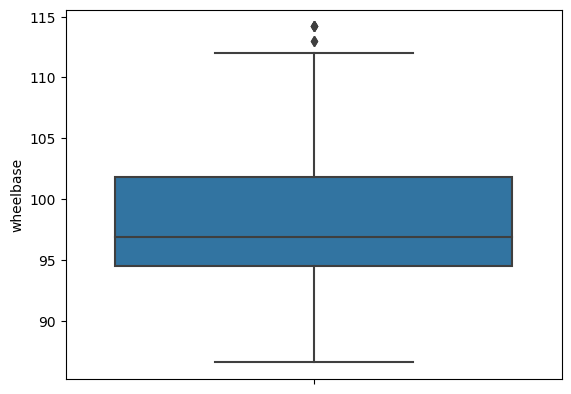

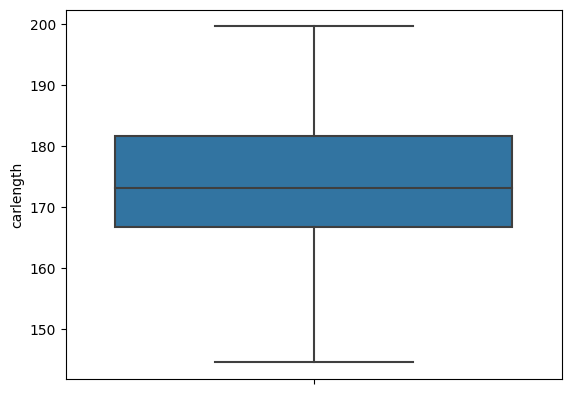

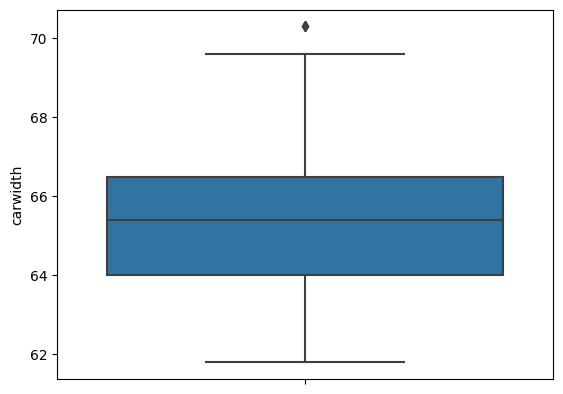

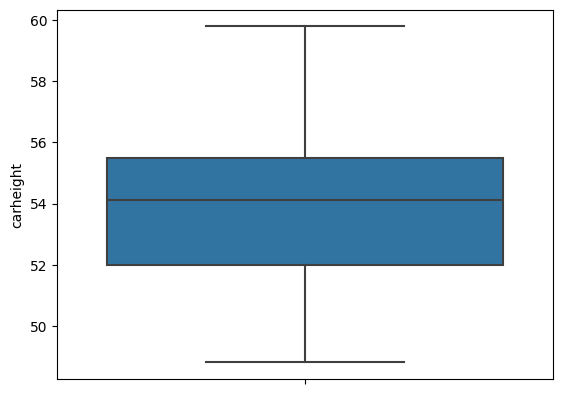

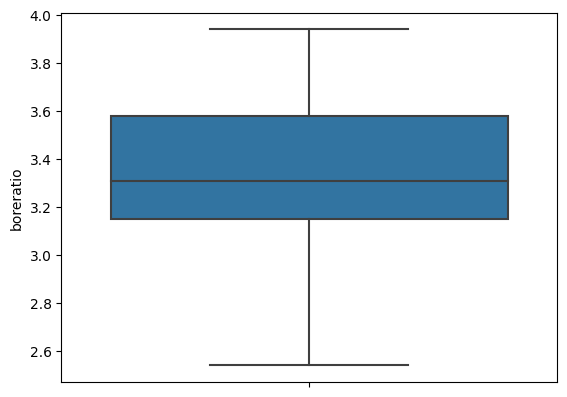

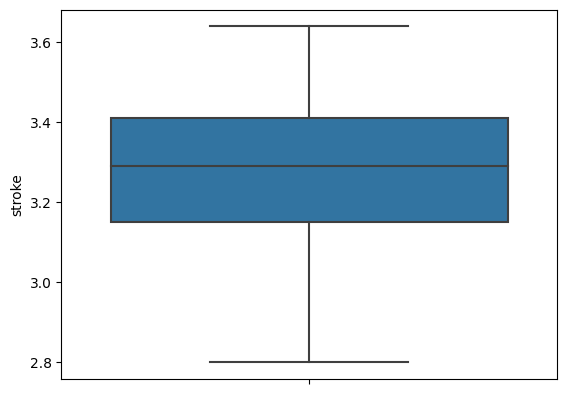

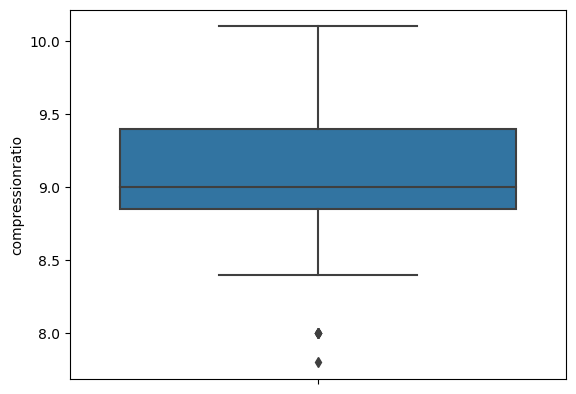

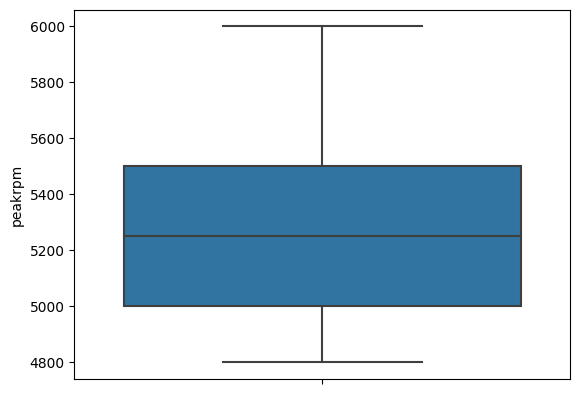

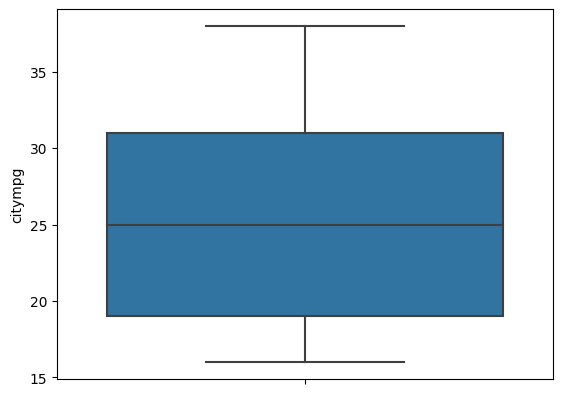

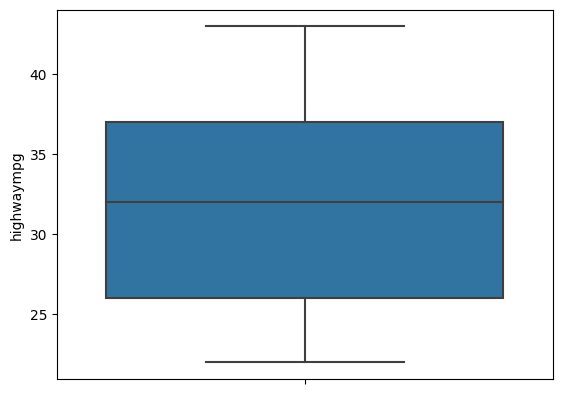

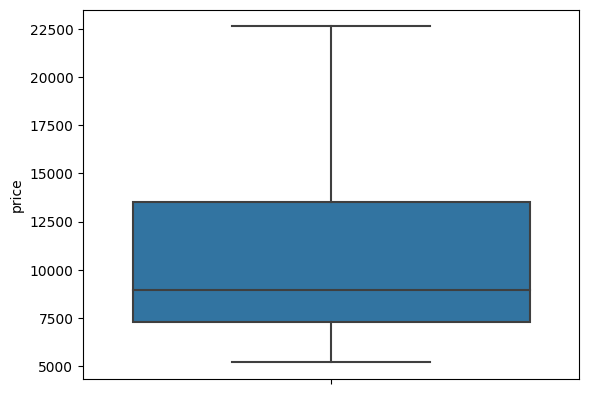

In [18]:
for i in num:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3-q1
    ul = q3+ 1.5*iqr
    ll = q1- 1.5*iqr
    df1 = df1[(df1[i]<ul)&(df1[i]>ll)]
    plt.figure()
    sns.boxplot(y=i,data=df1)

In [19]:
num.remove('price')

In [20]:
# Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [21]:
df1[num] = ss.fit_transform(df1[num])

In [22]:
df1[num]

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg
2,-0.683228,-0.017180,0.094387,-0.519706,-2.294624,1.255373,-0.182281,-0.804126,-1.209259,-0.995043
3,0.488456,0.481051,0.545225,0.257385,-0.299475,0.837602,2.215061,0.635359,-0.331449,-0.294436
4,0.400027,0.481051,0.674036,0.257385,-0.299475,0.837602,-2.579622,0.635359,-1.384821,-1.695649
5,0.488456,0.545637,0.609631,-0.233409,-0.299475,0.837602,-1.380951,0.635359,-1.209259,-1.170194
10,0.797957,0.499504,-0.356451,0.257385,0.913263,-2.743299,-0.661749,1.499050,-0.507011,-0.469588
...,...,...,...,...,...,...,...,...,...,...
201,1.483281,1.606686,1.189280,1.566169,2.008639,-0.654440,1.016390,0.347462,-0.331449,-0.644739
204,2.544428,1.606686,2.284173,0.748179,2.008639,-0.654440,1.016390,0.347462,-0.507011,-0.644739
205,2.544428,1.606686,2.219767,0.748179,2.008639,-0.654440,-0.901483,0.059565,-1.209259,-1.170194
206,2.544428,1.606686,2.284173,0.748179,1.226228,-2.325528,-0.661749,0.635359,-1.384821,-1.520498


In [23]:
X = df1[num]
y = df1['price']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=10)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)
y_pred

array([ 8212.27907445, 10480.95312646,  6465.86307764,  7345.73273994,
       15423.81491058, 10324.06566004,  5318.246488  , 11882.57026548,
       10083.26798327, 14271.12556564,  6358.23814441,  6465.86307764,
       10480.95312646, 17543.47770217, 15970.0193602 , 11529.23965726,
        7596.92036436, 16433.98698273, 10454.83386934,  5146.78325412,
       16567.14421466,  6824.58714563, 16812.8733953 ,  6658.30793663])

In [28]:
from sklearn import metrics

In [29]:
metrics.r2_score(y_test,y_pred)

0.7766632646779228

In [30]:
metrics.mean_squared_log_error(y_test, y_pred)

0.039977380624211994

In [31]:
metrics.mean_squared_error(y_test, y_pred)

3717795.9697272666

In [32]:
metrics.mean_squared_error(y_test, y_pred,squared=False)

1928.1586993106316

<AxesSubplot: xlabel='price'>

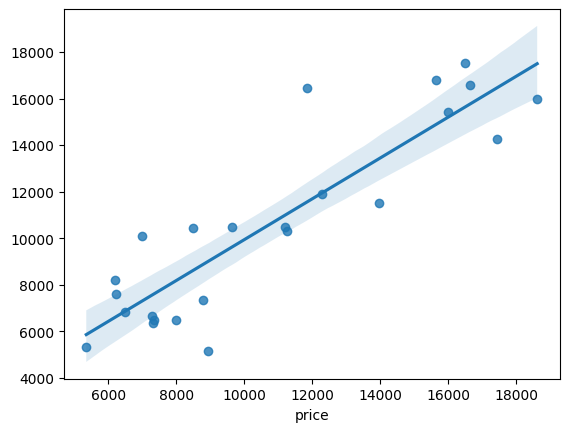

In [47]:
sns.regplot(x=y_test,y=y_pred)